In [4]:
#!/usr/bin/env python3
import os
import requests
from datetime import datetime
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

OWNER = "WATonomous"
REPO = "infra-config"

# For easier reading, we put the run IDs in lists by category.
BEFORE_USER_INGESTION = [
    "12427574689",
    "12427547885",
    "12424954086",
    "12424337584",
    "12422341445",
    "12420112260",
]

BEFORE_MASTER_SCHEDULED = [
    "12553360748",
    "12530736888",
    "12521935862",
    "12509665511",
    "12487314642",
    "12449453195",
    "12440178947",
    "12422821414",
]

AFTER_USER_INGESTION = [
    "12854845210",
    "12851571085",
    "12850108807",
    "12696207371",
    "12682617238",
]

AFTER_MASTER_SCHEDULED = [
    "12848528449",
    "12838792205",
    "12819860145",
    "12799262666",
    "12778673306",
    "12738272633",
]

def print_run_times(run_id: str, github_token: str):
    """
    Fetch and display the creation time, updated (completion) time, 
    and duration (in seconds) for the given workflow run ID.
    """
    url = f"https://api.github.com/repos/{OWNER}/{REPO}/actions/runs/{run_id}"
    headers = {
        "Accept": "application/vnd.github+json",
        "Authorization": f"Bearer {github_token}",
    }
    
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"ERROR: Failed to fetch run {run_id} (HTTP {response.status_code}).")
        return

    data = response.json()
    
    created_at_str = data.get("created_at")
    updated_at_str = data.get("updated_at")
    
    # Convert the timestamps to datetime objects
    # The timestamps are in ISO 8601 format like "2021-03-04T09:39:19Z"
    start_time = datetime.fromisoformat(created_at_str.replace("Z", "+00:00"))
    end_time   = datetime.fromisoformat(updated_at_str.replace("Z", "+00:00"))
    
    # Calculate duration in seconds
    duration_seconds = (end_time - start_time).total_seconds()
    if duration_seconds < 0:
        # If the run hasn't completed or there's an odd timestamp, keep it zero or skip
        duration_seconds = 0

    print(f"Run ID       : {run_id}")
    print(f"  Started    : {start_time}")
    print(f"  Completed  : {end_time}")
    print(f"  Duration   : {int(duration_seconds)} seconds")
    print()
    return duration_seconds


github_token = os.getenv("GITHUB_TOKEN")
if not github_token:
	print("ERROR: You must set GITHUB_TOKEN in your .env file or environment.")

print("===== BEFORE - USER INGESTION =====")
before_user_ingestion = []
for run_id in BEFORE_USER_INGESTION:
	duration = print_run_times(run_id, github_token)
	before_user_ingestion.append(duration)

print("===== BEFORE - MASTER SCHEDULED =====")
before_master_scheduled = []
for run_id in BEFORE_MASTER_SCHEDULED:
	duration = print_run_times(run_id, github_token)
	before_master_scheduled.append(duration)

print("===== AFTER - USER INGESTION =====")
after_user_ingestion = []
for run_id in AFTER_USER_INGESTION:
	duration = print_run_times(run_id, github_token)
	after_user_ingestion.append(duration)
	
print("===== AFTER - MASTER SCHEDULED =====")
after_master_scheduled = []
for run_id in AFTER_MASTER_SCHEDULED:
	duration = print_run_times(run_id, github_token)
	after_master_scheduled.append(duration)

===== BEFORE - USER INGESTION =====
Run ID       : 12427574689
  Started    : 2024-12-20 07:46:30+00:00
  Completed  : 2024-12-20 08:15:52+00:00
  Duration   : 1762 seconds

Run ID       : 12427547885
  Started    : 2024-12-20 07:43:56+00:00
  Completed  : 2024-12-20 08:12:58+00:00
  Duration   : 1742 seconds

Run ID       : 12424954086
  Started    : 2024-12-20 03:23:50+00:00
  Completed  : 2024-12-20 03:40:41+00:00
  Duration   : 1011 seconds

Run ID       : 12424337584
  Started    : 2024-12-20 02:22:12+00:00
  Completed  : 2024-12-20 02:42:23+00:00
  Duration   : 1211 seconds

Run ID       : 12422341445
  Started    : 2024-12-19 23:13:45+00:00
  Completed  : 2024-12-19 23:29:55+00:00
  Duration   : 970 seconds

Run ID       : 12420112260
  Started    : 2024-12-19 20:16:19+00:00
  Completed  : 2024-12-19 20:44:38+00:00
  Duration   : 1699 seconds

===== BEFORE - MASTER SCHEDULED =====
Run ID       : 12553360748
  Started    : 2024-12-31 00:01:04+00:00
  Completed  : 2024-12-31 00:23

==== Before - User Ingestion ====
  Mean: 1399.17, SE: 140.37
==== After - User Ingestion ====
  Mean: 711.60, SE: 27.75
==== Before - Master Scheduled ====
  Mean: 1630.00, SE: 189.13
==== After - Master Scheduled ====
  Mean: 843.50, SE: 46.10


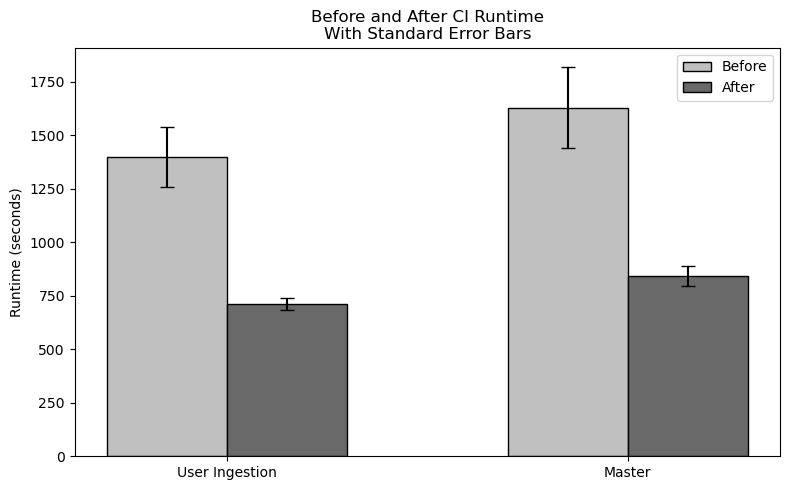

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def compute_stats(durations):
	"""Return (mean, standard error) for the given list of durations."""
	arr = np.array(durations, dtype=float)
	n = len(arr)
	return arr.mean(), arr.std() / np.sqrt(n)  # Changed to standard error

# 2) Compute mean/SE for each
bui_mean, bui_se = compute_stats(before_user_ingestion)
aui_mean, aui_se = compute_stats(after_user_ingestion)
bms_mean, bms_se = compute_stats(before_master_scheduled)
ams_mean, ams_se = compute_stats(after_master_scheduled)

# 3) Print out the stats (optional) 
print("==== Before - User Ingestion ====")
print(f"  Mean: {bui_mean:.2f}, SE: {bui_se:.2f}")
print("==== After - User Ingestion ====")
print(f"  Mean: {aui_mean:.2f}, SE: {aui_se:.2f}")
print("==== Before - Master Scheduled ====")
print(f"  Mean: {bms_mean:.2f}, SE: {bms_se:.2f}")
print("==== After - Master Scheduled ====")
print(f"  Mean: {ams_mean:.2f}, SE: {ams_se:.2f}")

# 4) Prepare data for plotting
x_positions = np.array([0, 1], dtype=float)
bar_width = 0.3

# Means for "Before" and "After"
before_means = [bui_mean, bms_mean]
after_means = [aui_mean, ams_mean]

# Standard errors for error bars
before_yerr = [bui_se, bms_se]
after_yerr = [aui_se, ams_se]

# 5) Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot "Before" bars
bars_before = ax.bar(
	x_positions - bar_width/2,
	before_means,
	yerr=before_yerr,
	width=bar_width,
	capsize=5,
	label="Before",
	color="silver",
	edgecolor="black",
)

# Plot "After" bars
bars_after = ax.bar(
	x_positions + bar_width/2,
	after_means,
	yerr=after_yerr,
	width=bar_width,
	capsize=5,
	label="After",
	color="dimgray",
	edgecolor="black",
)

# 6) Style the axes and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(["User Ingestion", "Master"])
ax.set_ylabel("Runtime (seconds)")
ax.set_title("Before and After CI Runtime\nWith Standard Error Bars")
ax.legend()

# Optional: Annotate the numeric mean above each bar
def annotate_bars(rects):
	for rect in rects:
		height = rect.get_height()
		ax.annotate(f"{height:.0f}",
					xy=(rect.get_x() + rect.get_width()/2, height),
					xytext=(0, 3),
					textcoords="offset points",
					ha="center", va="bottom")

# annotate_bars(bars_before)
# annotate_bars(bars_after)

plt.tight_layout()
ax.set_facecolor("none")
fig.patch.set_alpha(0.0)  # Make the background transparent
plt.show()
plt.savefig("light-slurm-ci-graph.png")


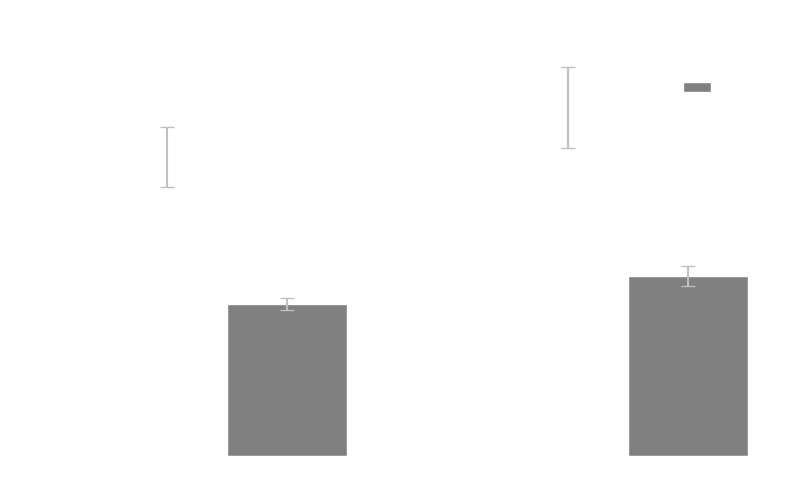

<Figure size 640x480 with 0 Axes>

In [6]:
# Create the plot with updated colors
fig, ax = plt.subplots(figsize=(8, 5), facecolor="none")

# Plot "Before" bars in white
bars_before = ax.bar(
	x_positions - bar_width/2,
	before_means,
	yerr=before_yerr,  # already using std from previous cell
	width=bar_width,
	capsize=5,
	label="Before",
	color="white",
	edgecolor="white",
	error_kw=dict(ecolor='silver')
)

# Plot "After" bars in gray
bars_after = ax.bar(
	x_positions + bar_width/2,
	after_means,
	yerr=after_yerr,  # already using std from previous cell
	width=bar_width,
	capsize=5,
	label="After",
	color="gray",
	edgecolor="white",
	error_kw=dict(ecolor='silver')
)

# Style the axes and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(["User Ingestion", "Master"], color="white")
ax.set_ylabel("Runtime (seconds)", color="white")
ax.set_title("Before and After CI Runtime\nWith Standard Error Bars", color="white")
ax.legend(facecolor="none", edgecolor="white", labelcolor="white")

# Make the axis white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_facecolor("none")

# Annotate bars
def annotate_bars(rects):
	for rect in rects:
		height = rect.get_height()
		ax.annotate(f"{height:.0f}",
					xy=(rect.get_x() + rect.get_width()/2, height),
					xytext=(0, 3),
					textcoords="offset points",
					ha="center", va="bottom",
					color="white")

# annotate_bars(bars_before)
# annotate_bars(bars_after)

plt.tight_layout()
plt.show()
plt.savefig("dark-slurm-ci-graph.png")

In [7]:
# RGW runs
rgw = ["11944109154", "11355869700"]

In [8]:
# 11349718689
# print data for this
url = f"https://api.github.com/repos/{OWNER}/{REPO}/actions/runs/11944109154"
headers = {
	"Accept": "application/vnd.github+json",
	"Authorization": f"Bearer {github_token}",
}

response = requests.get(url, headers=headers)

data = response.json()

In [9]:
data

{'id': 11944109154,
 'name': 'Provision',
 'node_id': 'WFR_kwLOFua8hc8AAAACx-ykYg',
 'head_branch': 'alexboden/test-ci-apptainer',
 'head_sha': '9642dcdf260382d7807564e6b19458f08049d0fd',
 'path': '.github/workflows/provision.yml',
 'display_title': 'Migrate CI to Slurm',
 'run_number': 8194,
 'event': 'pull_request',
 'status': 'completed',
 'conclusion': 'failure',
 'workflow_id': 22323472,
 'check_suite_id': 31144002488,
 'check_suite_node_id': 'CS_kwDOFua8hc8AAAAHQFPDuA',
 'url': 'https://api.github.com/repos/WATonomous/infra-config/actions/runs/11944109154',
 'html_url': 'https://github.com/WATonomous/infra-config/actions/runs/11944109154',
 'pull_requests': [],
 'created_at': '2024-11-21T00:21:13Z',
 'updated_at': '2024-11-21T00:42:17Z',
 'actor': {'login': 'alexboden',
  'id': 43760105,
  'node_id': 'MDQ6VXNlcjQzNzYwMTA1',
  'avatar_url': 'https://avatars.githubusercontent.com/u/43760105?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/alexboden',
  'html_url': 

In [10]:
# get this https://api.github.com/repos/WATonomous/infra-config/actions/workflows/22323472

url = f"https://api.github.com/repos/WATonomous/infra-config/actions/runs/11944109154/jobs"
headers = {
	"Accept": "application/vnd.github+json",
	"Authorization": f"Bearer {github_token}",
}

response = requests.get(url, headers=headers)

In [11]:
response.json()

{'total_count': 68,
 'jobs': [{'id': 33294447655,
   'run_id': 11944109154,
   'workflow_name': 'Provision',
   'head_branch': 'alexboden/test-ci-apptainer',
   'run_url': 'https://api.github.com/repos/WATonomous/infra-config/actions/runs/11944109154',
   'run_attempt': 1,
   'node_id': 'CR_kwDOFua8hc8AAAAHwID0Jw',
   'head_sha': '9642dcdf260382d7807564e6b19458f08049d0fd',
   'url': 'https://api.github.com/repos/WATonomous/infra-config/actions/jobs/33294447655',
   'html_url': 'https://github.com/WATonomous/infra-config/actions/runs/11944109154/job/33294447655',
   'status': 'completed',
   'conclusion': 'success',
   'created_at': '2024-11-21T00:21:15Z',
   'started_at': '2024-11-21T00:21:28Z',
   'completed_at': '2024-11-21T00:21:37Z',
   'name': 'shellcheck',
   'steps': [],
   'check_run_url': 'https://api.github.com/repos/WATonomous/infra-config/check-runs/33294447655',
   'labels': ['alexboden-gh-arc-runners-small'],
   'runner_id': 6867,
   'runner_name': 'slurm-tr-slurm1-17516'

In [12]:
headers = {
    "Accept": "application/vnd.github+json",
    "Authorization": f"Bearer {github_token}",
}

rgw = ["11944109154", "11355869700"]

results = {}

for wf_id in rgw:
    # 1) Get the workflow-run information for this ID
    run_url = f"https://api.github.com/repos/{OWNER}/{REPO}/actions/runs/{wf_id}"
    run_data = requests.get(run_url, headers=headers).json()
    print_run_times(wf_id, github_token)
    
    # 2) Extract the jobs_url from the run information
    jobs_url = run_data["jobs_url"]

    # 3) Retrieve the jobs
    jobs_data = requests.get(jobs_url, headers=headers).json()

    # 4) Filter down to jobs where the name contains "provision"
    provision_jobs = []
    for job in jobs_data.get("jobs", []):
        if "provision" in job["name"].lower():
            provision_jobs.append(job)

    results[wf_id] = provision_jobs

# `results` is now a dict keyed by workflow-run ID,
# containing only the jobs that have "provision" in the name.
# You can print or handle them as needed:

for wf_id, jobs in results.items():
    print(f"Workflow ID {wf_id}:")
    if jobs:
        for job in jobs:
            print(f"  - {job['name']}")
    else:
        print("  No jobs containing 'provision'")

Run ID       : 11944109154
  Started    : 2024-11-21 00:21:13+00:00
  Completed  : 2024-11-21 00:42:17+00:00
  Duration   : 1264 seconds

Run ID       : 11355869700
  Started    : 2024-10-15 23:19:37+00:00
  Completed  : 2024-10-15 23:40:22+00:00
  Duration   : 1245 seconds

Workflow ID 11944109154:
  - validate_provision_workflow_completeness
  - provision_tailscale
  - provision_mikrotik
  - provision_ansible_common
  - provision_cloudflare
  - provision_healthchecksio
  - provision_ansible_rsyslog
  - provision_ansible_ssh_hardening
  - provision_ansible_ceph
  - provision_ansible_docker
  - provision_ansible_cron_reboot
  - provision_ansible_nvidia_gpu
  - provision_ansible_slurmd
  - provision_ansible_swap
  - provision_ansible_tailscale
Workflow ID 11355869700:
  - validate_provision_workflow_completeness
  - provision_ansible_common
  - provision_cloudflare
  - provision_healthchecksio
  - provision_mikrotik
  - provision_tailscale
  - provision_ansible_slurmd
  - provision_ansi

In [13]:
headers = {
    "Accept": "application/vnd.github+json",
    "Authorization": f"Bearer {github_token}",
}

# Initial workflow IDs where we fetch provision job names
rgw = ["11944109154", "11355869700"]

# Workflows to check against provision jobs found in rgw
AFTER_MASTER_SCHEDULED = [
    "12848528449",
    "12838792205",
    "12819860145",
    "12799262666",
    "12778673306",
    "12738272633"
]

rgw_provision_job_names = set()

# Fetch provision job names from rgw workflows
for wf_id in rgw:
    print_run_times(wf_id, github_token)
    run_url = f"https://api.github.com/repos/{OWNER}/{REPO}/actions/runs/{wf_id}"
    run_data = requests.get(run_url, headers=headers).json()
    jobs_url = run_data["jobs_url"]
    jobs_data = requests.get(jobs_url, headers=headers).json()
    
    for job in jobs_data.get("jobs", []):
        if "provision" in job["name"].lower():
            rgw_provision_job_names.add(job["name"])

results = {}

# Now use the fetched names to find matches in AFTER_MASTER_SCHEDULED workflows
for wf_id in AFTER_MASTER_SCHEDULED:
    run_url = f"https://api.github.com/repos/{OWNER}/{REPO}/actions/runs/{wf_id}"
    run_data = requests.get(run_url, headers=headers).json()
    jobs_url = run_data["jobs_url"]
    jobs_data = requests.get(jobs_url, headers=headers).json()

    provision_jobs = []
    for job in jobs_data.get("jobs", []):
        if job["name"] in rgw_provision_job_names:
            provision_jobs.append(job)

    results[wf_id] = provision_jobs

# Print or analyze the results
for wf_id, jobs in results.items():
    print(f"Workflow ID {wf_id}: {len(jobs)} jobs match 'rgw' provision jobs")
    for job in jobs:
        print(f"  - {job['name']}")

# You can further analyze or export these results as needed.

Run ID       : 11944109154
  Started    : 2024-11-21 00:21:13+00:00
  Completed  : 2024-11-21 00:42:17+00:00
  Duration   : 1264 seconds

Run ID       : 11355869700
  Started    : 2024-10-15 23:19:37+00:00
  Completed  : 2024-10-15 23:40:22+00:00
  Duration   : 1245 seconds

Workflow ID 12848528449: 6 jobs match 'rgw' provision jobs
  - validate_provision_workflow_completeness
  - provision_cloudflare
  - provision_ansible_common
  - provision_healthchecksio
  - provision_mikrotik
  - provision_tailscale
Workflow ID 12838792205: 6 jobs match 'rgw' provision jobs
  - validate_provision_workflow_completeness
  - provision_tailscale
  - provision_mikrotik
  - provision_ansible_common
  - provision_cloudflare
  - provision_healthchecksio
Workflow ID 12819860145: 12 jobs match 'rgw' provision jobs
  - validate_provision_workflow_completeness
  - provision_mikrotik
  - provision_tailscale
  - provision_ansible_common
  - provision_healthchecksio
  - provision_cloudflare
  - provision_ansible

In [23]:
import requests
import pandas as pd
from datetime import datetime

headers = {
    "Accept": "application/vnd.github+json",
    "Authorization": f"Bearer {github_token}",
}

# Initial workflow IDs where we fetch provision job names
rgw = [
    	# "11944109154", 
       "11355869700"
       ]

In [ ]:

# Workflows to check against provision jobs found in rgw
AFTER_MASTER_SCHEDULED = [
    "12848528449",
    "12838792205",
    "12819860145",
    "12799262666",
    "12778673306",
    "12738272633",
]

rgw_provision_job_names = set()

# Fetch provision job names from rgw workflows
for wf_id in rgw:
    run_url = f"https://api.github.com/repos/{OWNER}/{REPO}/actions/runs/{wf_id}"
    run_data = requests.get(run_url, headers=headers).json()
    jobs_url = run_data["jobs_url"]
    jobs_data = requests.get(jobs_url, headers=headers).json()
    
    for job in jobs_data.get("jobs", []):
        if "provision" in job["name"].lower():
            rgw_provision_job_names.add(job["name"])

# Store job run times
job_durations = []

# Now use the fetched names to find matches in AFTER_MASTER_SCHEDULED workflows
for wf_id in AFTER_MASTER_SCHEDULED:
    run_url = f"https://api.github.com/repos/{OWNER}/{REPO}/actions/runs/{wf_id}"
    run_data = requests.get(run_url, headers=headers).json()
    jobs_url = run_data["jobs_url"]
    jobs_data = requests.get(jobs_url, headers=headers).json()

    for job in jobs_data.get("jobs", []):
        if job["name"] in rgw_provision_job_names:
            # Parse timestamps
            started_at = job.get("started_at")
            completed_at = job.get("completed_at")

            if started_at and completed_at:
                start_time = datetime.fromisoformat(started_at.replace("Z", "+00:00"))
                end_time = datetime.fromisoformat(completed_at.replace("Z", "+00:00"))
                duration = (end_time - start_time).total_seconds()

                job_durations.append({
                    "workflow_id": wf_id,
                    "job_name": job["name"],
                    "start_time": start_time,
                    "end_time": end_time,
                    "duration_seconds": duration
                })

# Convert to DataFrame for analysis
df_master = pd.DataFrame(job_durations)

In [24]:
job_durations = []

# Now use the fetched names to find matches in AFTER_MASTER_SCHEDULED workflows
for wf_id in rgw:
    run_url = f"https://api.github.com/repos/{OWNER}/{REPO}/actions/runs/{wf_id}"
    run_data = requests.get(run_url, headers=headers).json()
    jobs_url = run_data["jobs_url"]
    jobs_data = requests.get(jobs_url, headers=headers).json()

    for job in jobs_data.get("jobs", []):
        if job["name"] in rgw_provision_job_names:
            # Parse timestamps
            started_at = job.get("started_at")
            completed_at = job.get("completed_at")

            if started_at and completed_at:
                start_time = datetime.fromisoformat(started_at.replace("Z", "+00:00"))
                end_time = datetime.fromisoformat(completed_at.replace("Z", "+00:00"))
                duration = (end_time - start_time).total_seconds()

                job_durations.append({
                    "workflow_id": wf_id,
                    "job_name": job["name"],
                    "start_time": start_time,
                    "end_time": end_time,
                    "duration_seconds": duration
                })

# Convert to DataFrame for analysis
df_rgw = pd.DataFrame(job_durations)

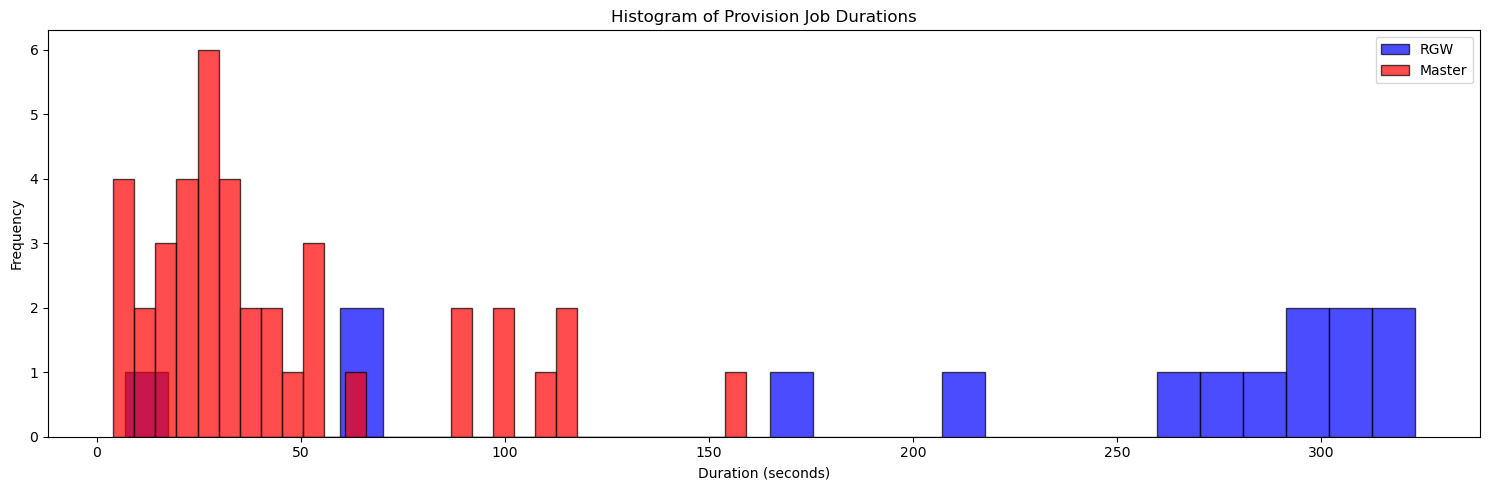

In [25]:
import matplotlib.pyplot as plt

# Ensure dataframes are not empty before plotting
if not df_rgw.empty and not df_master.empty:
	fig, ax = plt.subplots(figsize=(15, 5))

	# Plot histogram for RGW job durations
	ax.hist(df_rgw["duration_seconds"], bins=30, alpha=0.7, label="RGW", color="blue", edgecolor='black')

	# Plot histogram for Master job durations
	ax.hist(df_master["duration_seconds"], bins=30, alpha=0.7, label="Master", color="red", edgecolor='black')

	ax.set_xlabel("Duration (seconds)")
	ax.set_ylabel("Frequency")
	ax.set_title("Histogram of Provision Job Durations")
	ax.legend()

	plt.tight_layout()
	plt.show()
else:
	print("No data available for plotting.")


In [26]:
# print the average jobs duration for rgw and master
print("RGW Jobs Average Duration:", df_rgw['duration_seconds'].mean())
print("Master Jobs Average Duration:", df_master['duration_seconds'].mean())

RGW Jobs Average Duration: 228.85714285714286
Master Jobs Average Duration: 44.625
